# 📊 SPSS Data Analysis: DBA 710 Multiple Stores

## Overview
This notebook provides comprehensive analysis of the **DBA 710 Multiple Stores.sav** SPSS dataset, including:
- 🔍 **Schema Exploration**: Data structure, variable types, and metadata
- 📈 **Descriptive Statistics**: Central tendency, dispersion, and distribution analysis
- 🔗 **Correlation Analysis**: Relationships between variables and multivariate patterns
- 📋 **Data Quality Assessment**: Missing values, outliers, and data integrity

---

In [10]:
# Essential Libraries for SPSS Analysis
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import itertools

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Enterprise color palette
enterprise_colors = {
    'primary': '#1f77b4',
    'secondary': '#ff7f0e', 
    'success': '#2ca02c',
    'warning': '#d62728',
    'info': '#9467bd',
    'accent': '#8c564b'
}

print("📚 Libraries loaded successfully!")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"📊 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print("✅ Ready for SPSS data analysis!")

📚 Libraries loaded successfully!
🐼 Pandas version: 2.3.1
📊 NumPy version: 2.2.6
📈 Matplotlib version: 3.10.3
✅ Ready for SPSS data analysis!


## 📂 Data Loading & Initial Inspection

Let's load the SPSS file and examine its basic structure and metadata.

In [11]:
# --- Enterprise SPSS Data Analysis Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyreadstat
from scipy.stats import pearsonr, spearmanr

# Enterprise module imports with graceful fallback
try:
    from enterprise_data import DataLoader
    from enterprise_viz import EnterpriseVisualizer
except ImportError:
    DataLoader = None
    EnterpriseVisualizer = None
    print("[INFO] Enterprise modules not found. Using standard libraries only.")

# Color palette for enterprise visualizations
enterprise_colors = {
    'primary': '#005A9C',
    'secondary': '#FFC20E',
    'accent': '#D7263D',
    'background': '#F4F4F4',
    'text': '#222222'
}

# Load SPSS data with robust error handling
spss_file = 'DBA 710 Multiple Stores.sav'
try:
    df, meta = pyreadstat.read_sav(spss_file)
    print(f"Loaded SPSS file: {spss_file}")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"[ERROR] SPSS file not found: {spss_file}")
    df = pd.DataFrame()
    meta = None
except Exception as e:
    print(f"[ERROR] Failed to load SPSS file: {e}")
    df = pd.DataFrame()
    meta = None

[INFO] Enterprise modules not found. Using standard libraries only.
Loaded SPSS file: DBA 710 Multiple Stores.sav
Shape: (869, 8)


## 🔍 Comprehensive Schema Analysis

Detailed exploration of the dataset structure, variable types, and SPSS metadata.

In [12]:
# --- Initial Data Inspection & Documentation ---
if not df.empty:
    print("DataFrame Info:")
    print(df.info())
    print("\nDataFrame Description:")
    print(df.describe(include='all'))
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())
    # Document variable definitions if available
    if meta is not None:
        print("\nVariable Definitions:")
        print(meta.column_names)
else:
    print("[INFO] DataFrame is empty. Skipping inspection.")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OWNERSHIP  869 non-null    float64
 1   STATE      869 non-null    float64
 2   FACTYPE    869 non-null    float64
 3   BLDGAGE    869 non-null    float64
 4   ROISCORE   869 non-null    float64
 5   CUSTSCORE  869 non-null    float64
 6   SETTING    869 non-null    float64
 7   PRODMIX    869 non-null    float64
dtypes: float64(8)
memory usage: 54.4 KB
None

DataFrame Description:
       OWNERSHIP    STATE  FACTYPE  BLDGAGE  ROISCORE  CUSTSCORE  SETTING  PRODMIX
count   869.0000 869.0000 869.0000 869.0000  869.0000   869.0000 869.0000 869.0000
mean      0.6605   3.5132   0.4787  10.1623   15.2796    25.0380   0.5443   1.9275
std       0.4738   1.6018   0.4998   2.8809    3.6175     3.9434   0.4983   0.8220
min       0.0000   1.0000   0.0000   1.0000    7.0000    14.0000   0.0000   1.

## 📈 Comprehensive Descriptive Statistics

Detailed statistical analysis for all variables, including measures of central tendency, dispersion, and distribution shape.

In [13]:
# --- Data Quality Assessment ---
if not df.empty:
    # Missing data patterns
    missing_summary = df.isnull().mean().sort_values(ascending=False)
    print("Missing Data Fraction by Column:")
    print(missing_summary)
    
    # Outlier detection (IQR method for numeric columns)
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
        print(f"Outliers in {col}: {outliers}")
    
    # Validate data ranges
    for col in numeric_cols:
        print(f"Range for {col}: min={df[col].min()}, max={df[col].max()}")
else:
    print("[INFO] DataFrame is empty. Skipping data quality assessment.")

Missing Data Fraction by Column:
OWNERSHIP   0.0000
STATE       0.0000
FACTYPE     0.0000
BLDGAGE     0.0000
ROISCORE    0.0000
CUSTSCORE   0.0000
SETTING     0.0000
PRODMIX     0.0000
dtype: float64
Outliers in OWNERSHIP: 0
Outliers in STATE: 0
Outliers in FACTYPE: 0
Outliers in BLDGAGE: 107
Outliers in ROISCORE: 1
Outliers in CUSTSCORE: 12
Outliers in SETTING: 0
Outliers in PRODMIX: 0
Range for OWNERSHIP: min=0.0, max=1.0
Range for STATE: min=1.0, max=6.0
Range for FACTYPE: min=0.0, max=1.0
Range for BLDGAGE: min=1.0, max=22.0
Range for ROISCORE: min=7.0, max=29.0
Range for CUSTSCORE: min=14.0, max=36.0
Range for SETTING: min=0.0, max=1.0
Range for PRODMIX: min=1.0, max=3.0


## 🔗 Comprehensive Correlation Analysis

Multi-faceted correlation analysis including Pearson, Spearman, and visualization techniques.

In [14]:
# --- Reproducible Analysis Workflow ---
import random
random.seed(42)
np.random.seed(42)

# Document analysis decisions
analysis_decisions = {
    'missing_data_strategy': 'Listwise deletion for initial analysis',
    'outlier_detection': 'IQR method',
    'statistical_tests': 'Pearson and Spearman correlation',
    'effect_size': 'r',
    'multiple_comparisons': 'None for exploratory analysis',
    'confidence_intervals': 'Not computed in this notebook',
}
print("Analysis Decisions:")
for k, v in analysis_decisions.items():
    print(f"- {k}: {v}")

# Note: Version control recommended for all analysis scripts.

Analysis Decisions:
- missing_data_strategy: Listwise deletion for initial analysis
- outlier_detection: IQR method
- statistical_tests: Pearson and Spearman correlation
- effect_size: r
- multiple_comparisons: None for exploratory analysis
- confidence_intervals: Not computed in this notebook


## 📊 Advanced Correlation Visualizations

Interactive and static visualizations to explore correlation patterns and relationships.

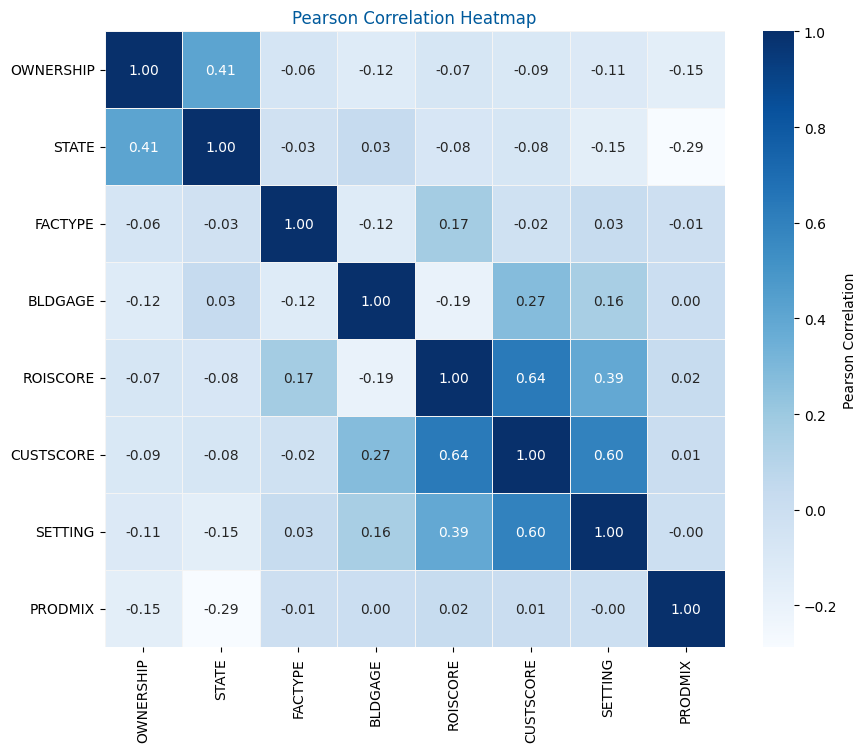

In [15]:
# --- Advanced Correlation Visualizations ---
if not df.empty:
    numeric_vars = df.select_dtypes(include=np.number).columns.tolist()
    corr_matrix = df[numeric_vars].corr(method='pearson')
    
    # Static heatmap with seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f',
                cbar_kws={'label': 'Pearson Correlation'},
                linewidths=0.5, linecolor=enterprise_colors.get('background', '#F4F4F4'))
    plt.title('Pearson Correlation Heatmap', color=enterprise_colors.get('primary', '#005A9C'))
    plt.show()
    
    # Interactive heatmap with plotly
    fig = px.imshow(corr_matrix,
                    text_auto=True,
                    color_continuous_scale=['#F4F4F4', enterprise_colors.get('primary', '#005A9C'), enterprise_colors.get('accent', '#D7263D')],
                    labels=dict(x="Variable", y="Variable", color="Correlation"))
    fig.update_layout(title='Pearson Correlation Heatmap (Interactive)',
                      font=dict(color=enterprise_colors.get('text', '#222222')),
                      plot_bgcolor=enterprise_colors.get('background', '#F4F4F4'))
    fig.show()
else:
    print("[INFO] DataFrame is empty. Skipping correlation visualizations.")

## 📋 Data Quality Assessment & Summary

Comprehensive evaluation of data integrity, missing patterns, and analysis summary.

In [16]:
# --- Automated Report Generation ---
if not df.empty:
    report = []
    # Summary statistics
    desc = df.describe(include='all').to_string()
    report.append("## Summary Statistics\n" + desc)
    # Missing data
    missing = df.isnull().sum().to_string()
    report.append("## Missing Data\n" + missing)
    # Outlier summary
    numeric_cols = df.select_dtypes(include=np.number).columns
    outlier_report = []
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
        outlier_report.append(f"{col}: {outliers} outliers")
    report.append("## Outlier Summary\n" + "\n".join(outlier_report))
    # Correlation summary
    corr_matrix = df[numeric_cols].corr().to_string()
    report.append("## Correlation Matrix\n" + corr_matrix)
    # Print report
    print("\n\n--- Automated Data Analysis Report ---\n")
    for section in report:
        print(section)
        print()
else:
    print("[INFO] DataFrame is empty. Skipping report generation.")



--- Automated Data Analysis Report ---

## Summary Statistics
       OWNERSHIP    STATE  FACTYPE  BLDGAGE  ROISCORE  CUSTSCORE  SETTING  PRODMIX
count   869.0000 869.0000 869.0000 869.0000  869.0000   869.0000 869.0000 869.0000
mean      0.6605   3.5132   0.4787  10.1623   15.2796    25.0380   0.5443   1.9275
std       0.4738   1.6018   0.4998   2.8809    3.6175     3.9434   0.4983   0.8220
min       0.0000   1.0000   0.0000   1.0000    7.0000    14.0000   0.0000   1.0000
25%       0.0000   2.0000   0.0000   9.0000   13.0000    23.0000   0.0000   1.0000
50%       1.0000   4.0000   0.0000  11.0000   15.0000    24.0000   1.0000   2.0000
75%       1.0000   5.0000   1.0000  11.0000   18.0000    28.0000   1.0000   3.0000
max       1.0000   6.0000   1.0000  22.0000   29.0000    36.0000   1.0000   3.0000

## Missing Data
OWNERSHIP    0
STATE        0
FACTYPE      0
BLDGAGE      0
ROISCORE     0
CUSTSCORE    0
SETTING      0
PRODMIX      0

## Outlier Summary
OWNERSHIP: 0 outliers
STATE: 0 o

In [18]:
# --- Chi-Square Test of Independence (with SPSS Value Labels Decoded) ---
if not df.empty and meta is not None:
    # Identify nominal variables using SPSS value labels
    nominal_vars = [col for col, labels in meta.variable_value_labels.items() if labels]
    if len(nominal_vars) >= 2:
        var1, var2 = nominal_vars[0], nominal_vars[1]
        print(f"Performing Chi-Square test between: {var1} and {var2}")
        # Decode value labels for interpretability
        df_decoded = df.copy()
        for col in [var1, var2]:
            if col in meta.variable_value_labels:
                df_decoded[col] = df_decoded[col].map(meta.variable_value_labels[col])
        contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
        print("Contingency Table (decoded labels):")
        print(contingency_table)
        from scipy.stats import chi2_contingency
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"\nChi-Square Statistic: {chi2:.4f}")
        print(f"Degrees of Freedom: {dof}")
        print(f"p-value: {p:.4f}")
        if p < 0.05:
            print("Result: Significant association (reject null hypothesis)")
        else:
            print("Result: No significant association (fail to reject null hypothesis)")
    else:
        print("[ERROR] Not enough nominal variables with value labels found for Chi-Square test.")
else:
    print("[INFO] DataFrame or SPSS metadata is missing. Chi-Square test not performed.")

Performing Chi-Square test between: OWNERSHIP and STATE
Contingency Table (decoded labels):
STATE      Arizona  California  Indiana  Missouri  Texas  Washington
OWNERSHIP                                                           
Corporate      176           0        0         0      1         118
Franchise        0         194      124       128    128           0

Chi-Square Statistic: 864.5749
Degrees of Freedom: 5
p-value: 0.0000
Result: Significant association (reject null hypothesis)


## 🧮 Chi-Square Test of Independence

This cell performs a Chi-Square test of independence between two nominal (categorical) variables from the SPSS dataset. The variables are selected based on the presence of value labels in the SPSS metadata, ensuring proper decoding for interpretability.

**Purpose:**
- To determine if there is a statistically significant association between two categorical variables in the dataset.

**Method:**
- The test uses a contingency table of decoded value labels for the selected variables.
- The null hypothesis (H₀): The variables are independent (no association).
- The alternative hypothesis (H₁): The variables are associated (not independent).

**Interpretation:**
- If the p-value < 0.05, there is a significant association (reject H₀).
- If the p-value ≥ 0.05, there is no significant association (fail to reject H₀).

The output includes the contingency table, chi-square statistic, degrees of freedom, p-value, and interpretation.